In [1]:
import numpy as np
import matplotlib.pyplot as plt

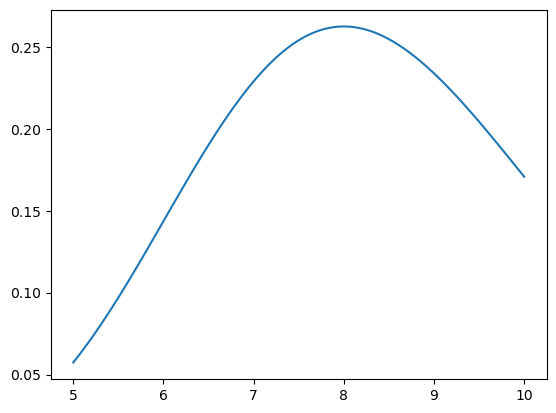

In [2]:
# homework question 3

lam = np.linspace(5,10 , num=100)
pdf = lam**16 * np.exp(-2*lam)

delta_lam = lam[1] - lam[0]
integral = pdf.sum() * delta_lam
# (note - I tried integrating this by hand but gave up!)

plt.plot(lam,pdf / integral)
plt.show()

In [3]:
import scipy.stats as stats

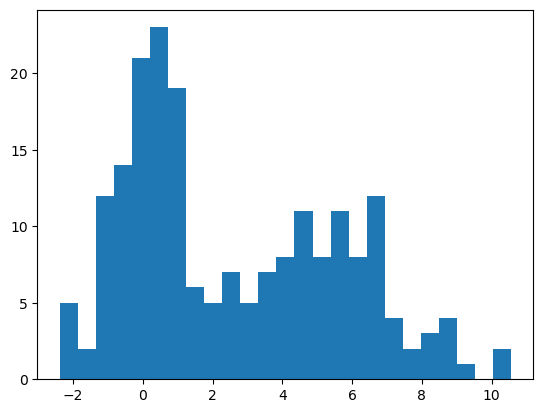

In [4]:
# create some data for us to cluster
x = stats.norm(loc=0 , scale=1).rvs(100)
y = stats.norm(loc=5 , scale=2).rvs(100)
data = np.append(x,y,axis=0)

plt.hist(data,bins=25)
plt.show()

In [5]:
ctr_0 = np.random.choice(data)
ctr_1 = np.random.choice(data)

cluster_0 = np.array([])
cluster_1 = np.array([])

for _ in range(10):
    print(ctr_0 , ctr_1, " --> ",end="")
    for d in data:
        if np.abs(d-ctr_0) < np.abs(d-ctr_1):
            cluster_0 = np.append(cluster_0 , d)
        else:
            cluster_1 = np.append(cluster_1 , d)

    ctr_0 = cluster_0.mean()
    ctr_1 = cluster_1.mean()
    print(ctr_0,ctr_1)


1.0715667739901065 9.343953125702633  --> 1.2479689795736648 6.838822505924554
1.2479689795736648 6.838822505924554  --> 0.956591035775773 6.402942044804821
0.956591035775773 6.402942044804821  --> 0.8260224316386422 6.255433528278006
0.8260224316386422 6.255433528278006  --> 0.7462913836206405 6.170745615240907
0.7462913836206405 6.170745615240907  --> 0.6923110046940741 6.116021114090014
0.6923110046940741 6.116021114090014  --> 0.6517542805941547 6.075130316278232
0.6517542805941547 6.075130316278232  --> 0.619059030837759 6.041804549769199
0.619059030837759 6.041804549769199  --> 0.5941219759388132 6.017521956081712
0.5941219759388132 6.017521956081712  --> 0.574474599351765 5.999041398054067
0.574474599351765 5.999041398054067  --> 0.5585952127951097 5.9845053069572245


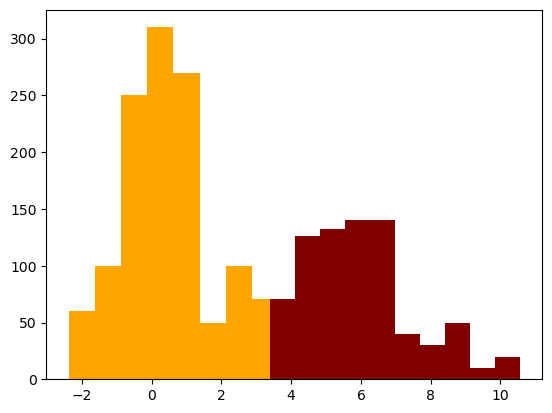

In [6]:
f,a = plt.subplots(1,1)
a.hist(cluster_0 , color='orange')
a.hist(cluster_1 , color='maroon')
plt.show()

In [7]:
w = stats.multivariate_normal(mean=[0,0],cov=[[1,0],[0,1]]).rvs(100)
x = stats.multivariate_normal(mean=[0,5],cov=[[1,0.4],[0.4,1]]).rvs(100)
y = stats.multivariate_normal(mean=[3,0],cov=[[1,0],[0,1]]).rvs(100)
z = stats.multivariate_normal(mean=[5,3],cov=[[1,-0.6],[-0.6,1]]).rvs(100)

data = np.vstack((w,x,y,z))

true_cluster_id = np.zeros((400,))
true_cluster_id[  0:100] = 0
true_cluster_id[100:200] = 1
true_cluster_id[200:300] = 2
true_cluster_id[300:400] = 3


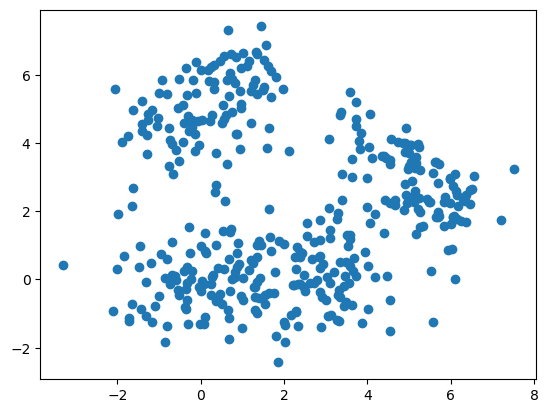

In [8]:
plt.scatter(data[:,0] , data[:,1])
plt.show()

In [9]:
k = 4
# data: 400x2
# ctrs: k=4 x 2
# dist: 400 x k=4
ctrs = np.zeros((k,2))
dist = np.zeros((400,k))

# sorry
ctrs[0,:] = data[np.random.choice(400),:]
ctrs[1,:] = data[np.random.choice(400),:]
ctrs[2,:] = data[np.random.choice(400),:]
ctrs[3,:] = data[np.random.choice(400),:]

for _ in range(10):
    for i in range(k):
        dist[:,i] = ((data - ctrs[i,:])**2).sum(axis=1)

    cluster_id = np.argmin(dist , axis=1)

    for i in range(k):
        ctrs[i,:] = data[cluster_id==i].mean(axis=0)


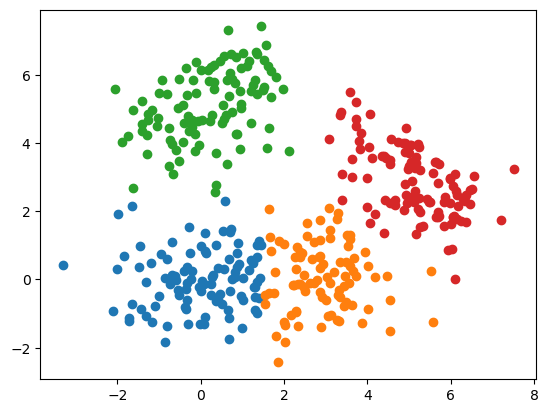

In [10]:
f,a = plt.subplots(1,1)
for i in range(k):
    a.scatter(data[cluster_id==i,0] , data[cluster_id==i,1])

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [12]:
cm = confusion_matrix(true_cluster_id , cluster_id)

In [13]:
print(cm)

[[ 90   9   1   0]
 [  0   0 100   0]
 [ 11  82   1   6]
 [  0   0   0 100]]


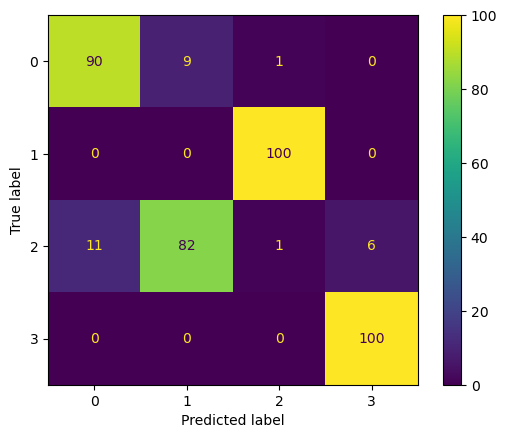

In [14]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [15]:
# are the divisions between clusters always straight lines?!
sz = 100
x_vec = np.linspace(-3,8,num=sz)
y_vec = np.linspace(-3,8,num=sz)
x_mat,y_mat = np.meshgrid(x_vec,y_vec)
x_mat = x_mat.flatten()
y_mat = y_mat.flatten()
xyp = np.stack((x_mat,y_mat),axis=1)

clust_id = np.zeros(sz*sz,)
di = np.zeros(4,)
for i in range(sz*sz):
    pt = np.array(xyp[i,:])
    di[0] = np.linalg.norm(pt-ctrs[0,:])
    di[1] = np.linalg.norm(pt-ctrs[1,:])
    di[2] = np.linalg.norm(pt-ctrs[2,:])
    di[3] = np.linalg.norm(pt-ctrs[3,:])
    clust_id[i] = np.argmin(di)


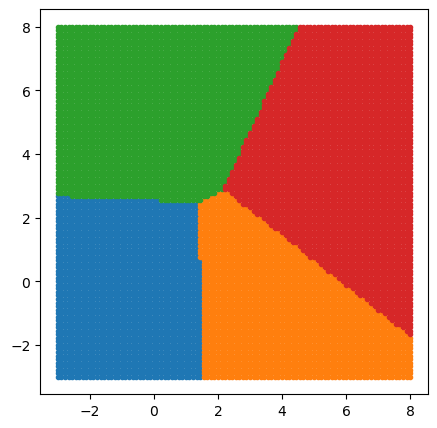

In [16]:
plt.figure(figsize=(5,5))
plt.plot(xyp[clust_id==0 ,0] , xyp[clust_id==0,1],'.')
plt.plot(xyp[clust_id==1 ,0] , xyp[clust_id==1,1],'.')
plt.plot(xyp[clust_id==2 ,0] , xyp[clust_id==2,1],'.')
plt.plot(xyp[clust_id==3 ,0] , xyp[clust_id==3,1],'.')
plt.show()